In [1]:
from sklearn import preprocessing
import numpy as np

import matplotlib.pyplot as plt
import scipy.stats as stats
import matplotlib.mlab as mlab
from scipy.stats import norm
import seaborn as sns
import plotly.express as px

from datetime import datetime
import pandas as pd



In [2]:
with open('SampleInput.txt') as f:
    data = f.readlines()


Preprocessing and extraction of columns from the text file


In [3]:
columns = ['Year','Day','Hour','Minutes','Seconds','Milliseconds','unknown']
rows = []
for i in data:
    if 'DTG' in i:
        columns.append(i.replace('\n',''))
    elif len(i.split(" "))>5:
        new_list = [j for j in i.split(" ") if j not in ['',0,'\n']]

        date_string = str(new_list[1]) + " " +  str(new_list[0]) + " " +  str(new_list[2]) + " " +  str(new_list[3]) + " " +  str(new_list[4]) + " " +  str(new_list[5])
        date_object = datetime.strptime(date_string, "%j %Y %H %M %S %f")
        new_list = new_list[6:]
        date_str = date_object.strftime("%Y-%m-%d %H %M %S %f")
        new_list.insert(0, date_str)
        
        
        if new_list[14] == 'ON':
            new_list[14] = 1
        else:
            new_list[14] = 0
            
        if new_list[15] == 'ON':
            new_list[15] = 1
        else:
            new_list[15] = 0
        
        if new_list[16] == 'ON':
            new_list[16] = 1
        else:
            new_list[16] = 0
            
        if new_list[17] == 'SYNC':
            new_list[17] = 1
        else:
            new_list[17] = 0
            
        if new_list[18] == 'NOT_USBL':
            new_list[18] = 0
        else:
            new_list[18] = 1
            
        if new_list[19] == 'ENA':
            new_list[19] = 1
        else:
            new_list[19] = 0
        
        if new_list[20] == 'LOW':
            new_list[20] = 0
        else:
            new_list[20] = 1
            
        if new_list[21] == 'ON':
            new_list[21] = 1
        else:
            new_list[21] = 0
            
        if new_list[22] == 'SYNC':
            new_list[22] = 1
        else:
            new_list[22] = 0
            
            
        rows.append(new_list)


In [4]:
columns = ['Date']+columns[6:]

In [5]:
import pandas as pd
df = pd.DataFrame()

In [6]:
for j in range(len(columns)):
    col_data = []
    for i in rows:        
        if j >= 1:
            col_data.append(float(i[j]))
        else: 
            col_data.append(i[j])
    df[columns[j]] = col_data
    
display(df)

,Date,unknown,DTG-1_PCH_ANALOG_RAT (Analog),DTG-1_ROL_ANALOG_RAT (Analog),DTG-1_PCH_FINE_RATE (Analog),DTG-1_ROL_FINE_RATE (Analog),DTG-2_YAW_ANALOG_RAT (Analog),DTG-2_PCH_ANALOG_RAT (Analog),DTG-2_YAW_FINE_RATE (Analog),DTG-2_PCH_FINE_RATE (Analog),...,DTG-2_ELECTRONICS_TH (Analog),DTG-2_SYNC_STS (Digital),DTG-2_ON_STS (Digital),DTG-1_ON_STS (Digital),DTG-2_RB_SUPPLY_STS (Digital),DTG-1_SYNC_STS (Digital),DTG-3_USBL_STS (Digital),DTG_ANALOG_RATE_CHK (Digital),DTG-2_TEMP_SEL_CMD_S (Digital),DTG-1_RB_SUPPLY_STS (Digital)
0,2018-04-15 17 39 55 043000,22.0,-0.0469,-0.0385,0.00542,0.01121,0.1294,-0.0687,0.00695,0.00769,...,52.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1,2018-04-15 17 39 55 555000,23.0,-0.0469,-0.0385,0.00542,0.01121,0.1294,-0.0687,0.00690,0.00769,...,52.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,2018-04-15 17 39 57 091000,26.0,-0.0469,-0.0385,0.00542,0.01121,0.1294,-0.0687,0.00690,0.00769,...,52.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
3,2018-04-15 17 39 58 627000,29.0,-0.0469,-0.0385,0.00542,0.01121,0.1294,-0.0687,0.00690,0.00769,...,52.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4,2018-04-15 17 40 02 211000,4.0,-0.0469,-0.0385,0.00542,0.01121,0.1294,-0.0687,0.00690,0.00769,...,52.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186293,2018-05-18 12 39 42 526000,22.0,-0.0469,-0.0385,0.00577,0.01131,-0.0981,-0.0687,0.00646,0.00799,...,51.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
186294,2018-05-18 12 39 43 038000,23.0,-0.0469,-0.0385,0.00582,0.01131,-0.0981,-0.0687,0.00651,0.00804,...,51.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
186295,2018-05-18 12 39 44 574000,26.0,-0.0469,-0.0385,0.00582,0.01131,-0.0981,-0.0687,0.00651,0.00804,...,51.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
186296,2018-05-18 12 39 46 110000,29.0,-0.0469,-0.0385,0.00582,0.01131,-0.0981,-0.0687,0.00651,0.00804,...,51.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


Preprocessed dataset

In [7]:
# copy the data
df_max_scaled = df.copy()

# Convert first column from python string to pandas date object
for column in df_max_scaled.columns[:1]:
    df_max_scaled[column] = pd.to_datetime(df_max_scaled[column], format="%Y-%m-%d %H %M %S %f")

  
# apply normalization techniques
for column in df_max_scaled.columns[1:]:
    if df_max_scaled[column].max() != 1 and df_max_scaled[column].min() != 0:
        df_max_scaled[column] = (df_max_scaled[column] - df_max_scaled[column].min()) / (df_max_scaled[column].max() - df_max_scaled[column].min())    
  

display(df_max_scaled)


,Date,unknown,DTG-1_PCH_ANALOG_RAT (Analog),DTG-1_ROL_ANALOG_RAT (Analog),DTG-1_PCH_FINE_RATE (Analog),DTG-1_ROL_FINE_RATE (Analog),DTG-2_YAW_ANALOG_RAT (Analog),DTG-2_PCH_ANALOG_RAT (Analog),DTG-2_YAW_FINE_RATE (Analog),DTG-2_PCH_FINE_RATE (Analog),...,DTG-2_ELECTRONICS_TH (Analog),DTG-2_SYNC_STS (Digital),DTG-2_ON_STS (Digital),DTG-1_ON_STS (Digital),DTG-2_RB_SUPPLY_STS (Digital),DTG-1_SYNC_STS (Digital),DTG-3_USBL_STS (Digital),DTG_ANALOG_RATE_CHK (Digital),DTG-2_TEMP_SEL_CMD_S (Digital),DTG-1_RB_SUPPLY_STS (Digital)
0,2018-04-15 17:39:55.043,0.72,0.47191,0.225,0.451191,0.509713,0.108696,0.548387,0.533333,0.450593,...,0.97561,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1,2018-04-15 17:39:55.555,0.76,0.47191,0.225,0.451191,0.509713,0.108696,0.548387,0.529317,0.450593,...,0.97561,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,2018-04-15 17:39:57.091,0.88,0.47191,0.225,0.451191,0.509713,0.108696,0.548387,0.529317,0.450593,...,0.97561,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
3,2018-04-15 17:39:58.627,1.00,0.47191,0.225,0.451191,0.509713,0.108696,0.548387,0.529317,0.450593,...,0.97561,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4,2018-04-15 17:40:02.211,0.00,0.47191,0.225,0.451191,0.509713,0.108696,0.548387,0.529317,0.450593,...,0.97561,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186293,2018-05-18 12:39:42.526,0.72,0.47191,0.225,0.478094,0.517483,0.086957,0.548387,0.493976,0.474308,...,0.95122,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
186294,2018-05-18 12:39:43.038,0.76,0.47191,0.225,0.481937,0.517483,0.086957,0.548387,0.497992,0.478261,...,0.95122,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
186295,2018-05-18 12:39:44.574,0.88,0.47191,0.225,0.481937,0.517483,0.086957,0.548387,0.497992,0.478261,...,0.95122,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
186296,2018-05-18 12:39:46.110,1.00,0.47191,0.225,0.481937,0.517483,0.086957,0.548387,0.497992,0.478261,...,0.95122,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


In [8]:


df_max_scaled.set_index('Date', inplace=True)

# Resample 
df_sample = df_max_scaled.resample('H').mean()
display(df_sample)

# Check if data is correct
from adtk.data import validate_series
df_max_scaled = validate_series(df_sample)
                                


,unknown,DTG-1_PCH_ANALOG_RAT (Analog),DTG-1_ROL_ANALOG_RAT (Analog),DTG-1_PCH_FINE_RATE (Analog),DTG-1_ROL_FINE_RATE (Analog),DTG-2_YAW_ANALOG_RAT (Analog),DTG-2_PCH_ANALOG_RAT (Analog),DTG-2_YAW_FINE_RATE (Analog),DTG-2_PCH_FINE_RATE (Analog),DTG-1_TH_TEMP (Analog),...,DTG-2_ELECTRONICS_TH (Analog),DTG-2_SYNC_STS (Digital),DTG-2_ON_STS (Digital),DTG-1_ON_STS (Digital),DTG-2_RB_SUPPLY_STS (Digital),DTG-1_SYNC_STS (Digital),DTG-3_USBL_STS (Digital),DTG_ANALOG_RATE_CHK (Digital),DTG-2_TEMP_SEL_CMD_S (Digital),DTG-1_RB_SUPPLY_STS (Digital)
Date,,,,,,,,,,,,,,,,,,,,,
2018-04-15 17:00:00,0.613565,0.472301,0.225000,0.449955,0.501486,0.099149,0.547265,0.532073,0.448541,0.965517,...,0.975610,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2018-04-15 18:00:00,0.620541,0.471910,0.225000,0.471328,0.500823,0.086957,0.548387,0.493723,0.469857,0.965517,...,0.972094,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2018-04-15 19:00:00,0.615000,0.471910,0.225000,0.477025,0.489636,0.090668,0.548387,0.506754,0.475308,0.967199,...,0.975015,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2018-04-15 20:00:00,0.615000,0.471108,0.225000,0.463895,0.509227,0.090839,0.547235,0.506426,0.462415,0.965517,...,0.975610,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2018-04-15 21:00:00,0.615000,0.471910,0.225000,0.470112,0.499618,0.087733,0.548387,0.496371,0.468309,0.963054,...,0.961672,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-05-18 08:00:00,0.615000,0.471910,0.225000,0.470215,0.504931,0.090301,0.548387,0.515022,0.469428,0.962865,...,0.958724,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2018-05-18 09:00:00,0.616879,0.471650,0.224422,0.474255,0.492657,0.088339,0.548387,0.496397,0.472979,0.934423,...,0.951220,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2018-05-18 10:00:00,0.606355,0.471910,0.225000,0.463734,0.493628,0.089395,0.548387,0.505836,0.461719,0.943925,...,0.951220,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>], dtype=object)

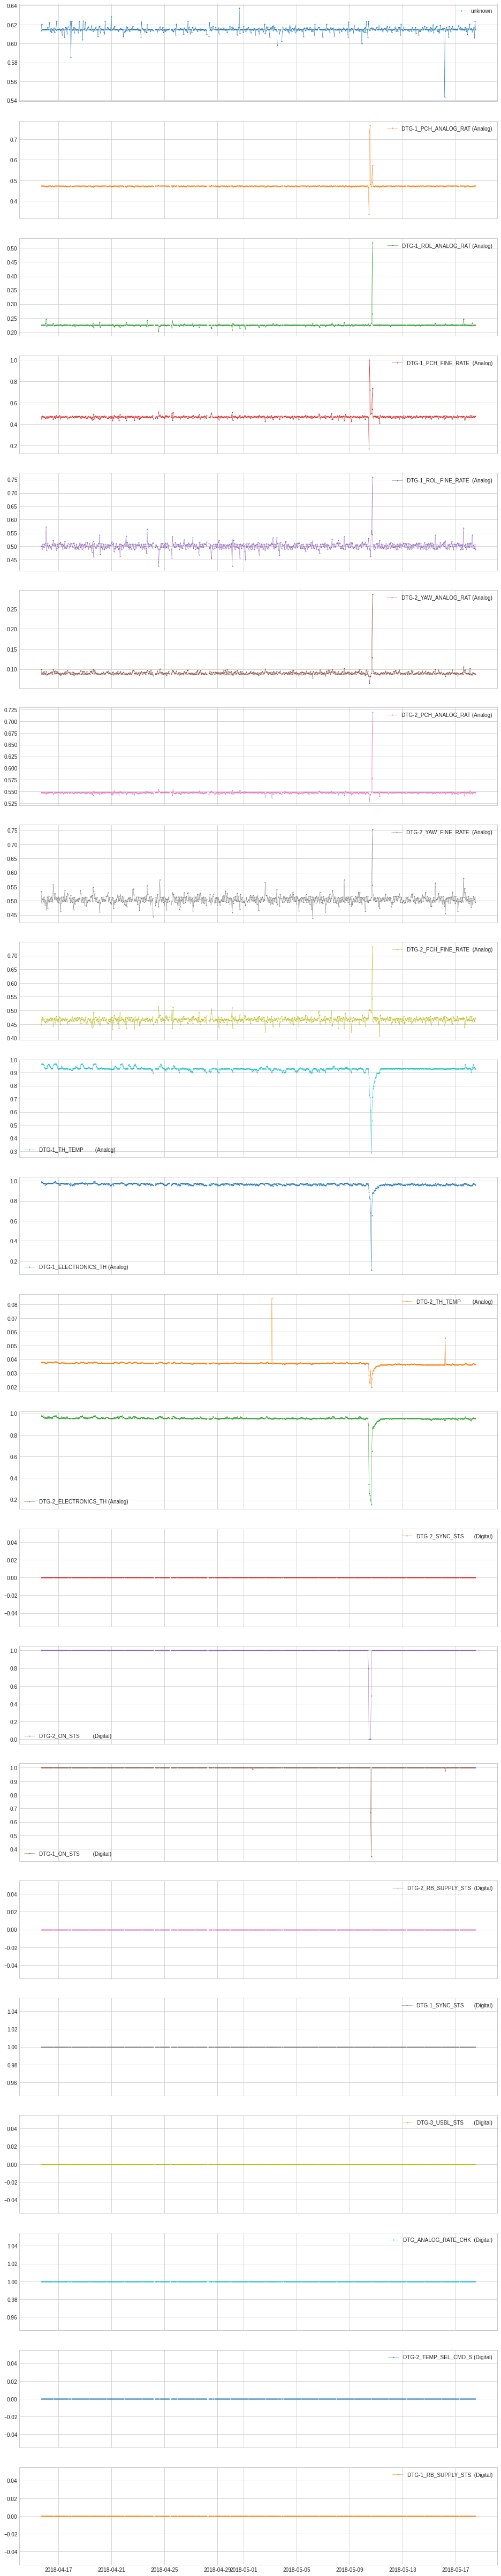

In [9]:
# We use the plot function from adtk to plot time series data
from adtk.visualization import plot
plot(df_sample)

In [13]:
from adtk.detector import AutoregressionAD

def myDetectionFunc(df):
    ano = pd.Series()
    for column in df.columns[1:]:
        print(column)
        ar = AutoregressionAD(c=80.0).fit_detect(df[column]).fillna(0).replace(0.0, False).replace(1.0, True)
        ano = ano | ar
    return ano


DTG-1_PCH_ANALOG_RAT (Analog)
DTG-1_ROL_ANALOG_RAT (Analog)
DTG-1_PCH_FINE_RATE  (Analog)
DTG-1_ROL_FINE_RATE  (Analog)
DTG-2_YAW_ANALOG_RAT (Analog)
DTG-2_PCH_ANALOG_RAT (Analog)
DTG-2_YAW_FINE_RATE  (Analog)
DTG-2_PCH_FINE_RATE  (Analog)
DTG-1_TH_TEMP        (Analog)
DTG-1_ELECTRONICS_TH (Analog)
DTG-2_TH_TEMP        (Analog)
DTG-2_ELECTRONICS_TH (Analog)
DTG-2_SYNC_STS       (Digital)
DTG-2_ON_STS         (Digital)
DTG-1_ON_STS         (Digital)
DTG-2_RB_SUPPLY_STS  (Digital)
DTG-1_SYNC_STS       (Digital)
DTG-3_USBL_STS       (Digital)
DTG_ANALOG_RATE_CHK  (Digital)
DTG-2_TEMP_SEL_CMD_S (Digital)
DTG-1_RB_SUPPLY_STS  (Digital)
<class 'pandas.core.series.Series'>
DatetimeIndex(['2018-05-01 16:00:00', '2018-05-01 17:00:00',
               '2018-05-03 03:00:00', '2018-05-08 04:00:00',
               '2018-05-08 05:00:00', '2018-05-10 10:00:00',
               '2018-05-10 11:00:00', '2018-05-10 12:00:00',
               '2018-05-10 13:00:00', '2018-05-10 14:00:00',
               '2018

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>], dtype=object)

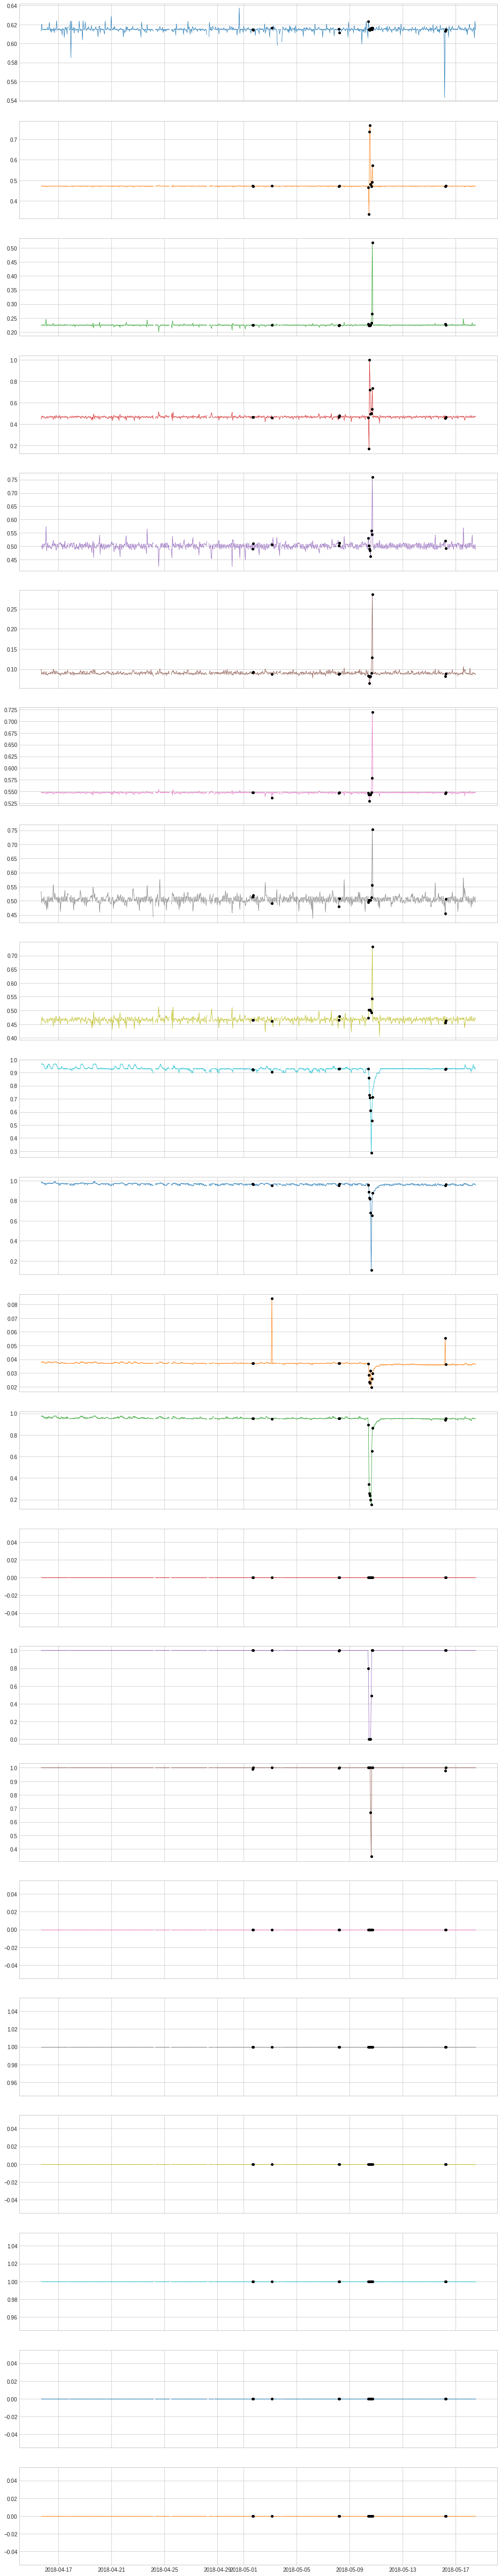

In [14]:
from adtk.detector import CustomizedDetectorHD
customized_detector = CustomizedDetectorHD(detect_func=myDetectionFunc)
anomalies = customized_detector.detect(df_sample)
print(type(anomalies))
print(anomalies[anomalies].index)
plot(df_sample,legend=False, anomaly=anomalies, ts_linewidth=-.75, ts_markersize=0.5, anomaly_marker='o',anomaly_tag="marker", anomaly_color='black')

[<AxesSubplot:>]

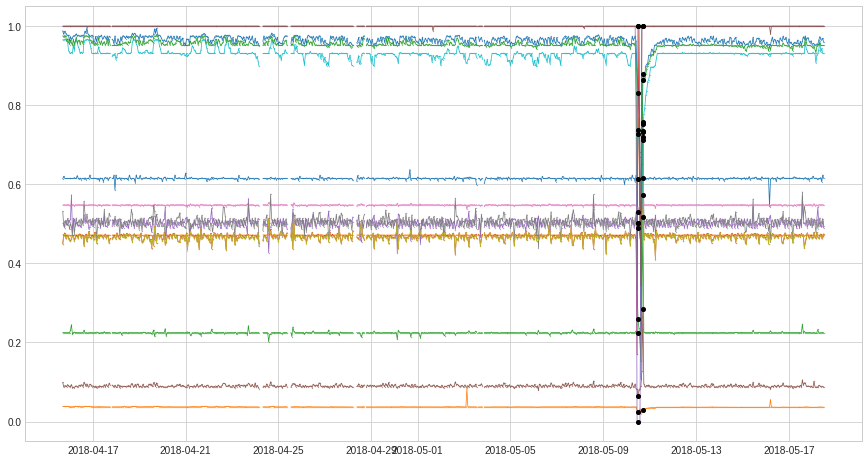

In [170]:
plot(df_sample,figsize=(15,8),legend=False, anomaly=anomalies, ts_linewidth=-.75, ts_markersize=0.5, anomaly_marker='o',anomaly_tag="marker", anomaly_color='black', curve_group='all')